<html><font size ="6"><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Student Perfomance Analytics</b></font></html>

# PROJECT GOAL
<br>

The **Requirement** of a Business Problem **is to develop a predictive model to Analyse and to classify the grades of student pursued** in academics using **Classification Analysis** with **Python**.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Loader Function to Load Dataframe

In [2]:
path ="StudentsPerformance.csv"
class DataFrame_Loader():
    data = path
    
    def __init__(self):
        
        print("Loadind DataFrame")
        
    def read_csv(self,data):
        self.df = pd.read_csv(data)
        
    def load_csv(self):
        return self.df

In [3]:
data = DataFrame_Loader()

Loadind DataFrame


In [4]:
data.read_csv(path)

In [5]:
df=data.load_csv()

In [6]:
df = df.rename(columns={'math score':'math_score','reading score':'reading_score','writing score':'writing_score'})
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Exploratory Data Analysis

In [67]:
class DataFrame_Information():

    def __init__(self):
        
        print("Attribute Information object created")
        
    def Attribute_information(self,df):
    
        data_info = pd.DataFrame(
                                columns=['No of observation',
                                        'No of Variables',
                                        'No of Numerical Variables',
                                        'No of Factor Variables',
                                        'No of Categorical Variables',
                                        'No of Logical Variables',
                                        'No of Date Variables',
                                        'No of zero variance variables'])


        data_info.loc[0,'No of observation'] = df.shape[0]
        data_info.loc[0,'No of Variables'] = df.shape[1]
        data_info.loc[0,'No of Numerical Variables'] = df._get_numeric_data().shape[1]
        data_info.loc[0,'No of Factor Variables'] = df.select_dtypes(include='category').shape[1]
        data_info.loc[0,'No of Logical Variables'] = df.select_dtypes(include='bool').shape[1]
        data_info.loc[0,'No of Categorical Variables'] = df.select_dtypes(include='object').shape[1]
        data_info.loc[0,'No of Date Variables'] = df.select_dtypes(include='datetime64').shape[1]
        data_info.loc[0,'No of zero variance variables'] = df.loc[:,df.apply(pd.Series.nunique)==1].shape[1]

        data_info =data_info.transpose()
        data_info.columns=['value']
        data_info['value'] = data_info['value'].astype(int)


        return data_info

    def __get_missing_values(self,data):
        
        #Getting sum of missing values for each feature
        missing_values = data.isnull().sum()
        #Feature missing values are sorted from few to many
        missing_values.sort_values(ascending=False, inplace=True)
        
        #Returning missing values
        return missing_values

    def Generate_Schema(self,data):
        
        feature_dtypes=data.dtypes
        self.missing_values=self.__get_missing_values(data)

        print("=" * 110)

        print("{:16} {:16} {:20} {:16}".format("Feature Name".upper(),
                                            "Data Type".upper(),
                                            "# of Missing Values".upper(),
                                            "Samples".upper()))
        for feature_name, dtype, missing_value in zip(self.missing_values.index.values,
                                                      feature_dtypes[self.missing_values.index.values],
                                                      self.missing_values.values):
            print("{:18} {:19} {:19} ".format(feature_name, str(dtype), str(missing_value)), end="")
            for v in data[feature_name].values[:5]:
                print(v, end=",")
            print()

        print("="*110)
        
    def Agg_Tabulation(self,data):
        
        print("=" * 110)
        print("Aggregation of Table")
        print("=" * 110)
        table = pd.DataFrame(data.dtypes,columns=['dtypes'])
        table1 =pd.DataFrame(data.columns,columns=['Names'])
        table = table.reset_index()
        table= table.rename(columns={'index':'Name'})
        table['No of Missing'] = data.isnull().sum().values    
        table['No of Uniques'] = data.nunique().values
        table['Percent of Missing'] = ((data.isnull().sum().values)/ (data.shape[0])) *100
        table['First Observation'] = data.loc[0].values
        table['Second Observation'] = data.loc[1].values
        table['Third Observation'] = data.loc[2].values
        for name in table['Name'].value_counts().index:
            table.loc[table['Name'] == name, 'Entropy'] = round(stats.entropy(data[name].value_counts(normalize=True), base=2),2)
        return table
    
        print("=" * 110)
        
    def __IQR(self,x):
        return x.quantile(q=0.75) - x.quantile(q=0.25)

    def __Outlier_Count(self,x):
        upper_out = x.quantile(q=0.75) + 1.5 * self.__IQR(x)
        lower_out = x.quantile(q=0.25) - 1.5 * self.__IQR(x)
        return len(x[x > upper_out]) + len(x[x < lower_out])

    def Numeric_Count_Summary(self,df):
        df_num = df._get_numeric_data()
        data_info_num = pd.DataFrame()
        i=0
        for c in  df_num.columns:
            data_info_num.loc[c,'Negative values count']= df_num[df_num[c]<0].shape[0]
            data_info_num.loc[c,'Positive values count']= df_num[df_num[c]>0].shape[0]
            data_info_num.loc[c,'Zero count']= df_num[df_num[c]==0].shape[0]
            data_info_num.loc[c,'Unique count']= len(df_num[c].unique())
            data_info_num.loc[c,'Negative Infinity count']= df_num[df_num[c]== -np.inf].shape[0]
            data_info_num.loc[c,'Positive Infinity count']= df_num[df_num[c]== np.inf].shape[0]
            data_info_num.loc[c,'Missing Percentage']= df_num[df_num[c].isnull()].shape[0]/ df_num.shape[0]
            data_info_num.loc[c,'Count of outliers']= self.__Outlier_Count(df_num[c])
            i = i+1
        return data_info_num
    
    def Statistical_Summary(self,df):
    
        df_num = df._get_numeric_data()

        data_stat_num = pd.DataFrame()

        try:
            data_stat_num = pd.concat([df_num.describe().transpose(),
                                       pd.DataFrame(df_num.quantile(q=0.10)),
                                       pd.DataFrame(df_num.quantile(q=0.90)),
                                       pd.DataFrame(df_num.quantile(q=0.95))],axis=1)
            data_stat_num.columns = ['count','mean','std','min','25%','50%','75%','max','10%','90%','95%']
        except:
            pass

        return data_stat_num
    
    def group_by_Num_variables(self,df,x,y):
        d=df.groupby([x])[y].describe()
        data_stat_num = pd.DataFrame()

        try:
                data_stat_num = pd.concat([d,
                                           pd.DataFrame(df_num.quantile(q=0.10)),
                                           pd.DataFrame(df_num.quantile(q=0.90)),
                                           pd.DataFrame(df_num.quantile(q=0.95))],axis=1)
                data_stat_num.columns = ['count','mean','std','min','25%','50%','75%','max','10%','90%','95%']
        except:
            pass

        return data_stat_num

In [68]:
Info = DataFrame_Information()

Attribute Information object created


In [9]:
Info.Attribute_information(df)

,value
No of observation,1000
No of Variables,8
No of Numerical Variables,3
No of Factor Variables,0
No of Categorical Variables,5
No of Logical Variables,0
No of Date Variables,0
No of zero variance variables,0


In [10]:
Info.Generate_Schema(df)

FEATURE NAME     DATA TYPE        # OF MISSING VALUES  SAMPLES         
writing_score      int64               0                   74,88,93,44,75,
reading_score      int64               0                   72,90,95,57,78,
math_score         int64               0                   72,69,90,47,76,
test preparation course object              0                   none,completed,none,none,none,
lunch              object              0                   standard,standard,standard,free/reduced,standard,
parental level of education object              0                   bachelor's degree,some college,master's degree,associate's degree,some college,
race/ethnicity     object              0                   group B,group C,group B,group A,group C,
gender             object              0                   female,female,female,male,male,


In [11]:
Info.Agg_Tabulation(df)

Aggregation of Table


,Name,dtypes,No of Missing,No of Uniques,Percent of Missing,First Observation,Second Observation,Third Observation,Entropy
0,gender,object,0,2,0.0,female,female,female,1.00
1,race/ethnicity,object,0,5,0.0,group B,group C,group B,2.20
2,parental level of education,object,0,6,0.0,bachelor's degree,some college,master's degree,2.48
3,lunch,object,0,2,0.0,standard,standard,standard,0.94
4,test preparation course,object,0,2,0.0,none,completed,none,0.94
5,math_score,int64,0,81,0.0,72,69,90,5.88
6,reading_score,int64,0,72,0.0,72,90,95,5.79
7,writing_score,int64,0,77,0.0,74,88,93,5.87


In [12]:
Info.Numeric_Count_Summary(df)

,Negative values count,Positive values count,Zero count,Unique count,Negative Infinity count,Positive Infinity count,Missing Percentage,Count of outliers
math_score,0.0,999.0,1.0,81.0,0.0,0.0,0.0,8.0
reading_score,0.0,1000.0,0.0,72.0,0.0,0.0,0.0,6.0
writing_score,0.0,1000.0,0.0,77.0,0.0,0.0,0.0,5.0


In [13]:
Info.Statistical_Summary(df)

,count,mean,std,min,25%,50%,75%,max,10%,90%,95%
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0,47.0,86.0,90.05
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0,51.0,87.1,92.00
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0,48.0,87.0,92.00


# EDA and Preprocessing  With Visualization

In [17]:
 from math import *
class DataFrame_Visualizer():

    def __init__(self):
        
        print("Visualizer object created")
        
    def Bar_graph(self,df,x):
        plt.figure(figsize=(20,7))
        x.value_counts(normalize = True)
        x.value_counts(dropna = False).plot.bar(color='blue')
        plt.xlabel('variable')
        plt.ylabel('count')
        plt.show()
        
    def cross_tab_with_stacked_bar_chart(self,df,x,y):
        x = pd.crosstab(x, y)
        return x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 4))
    
    def count_plot_for_variables(self,df,x,y,z):
        sns.countplot(x = x, data = df, hue = y, palette = z)
        plt.show()
        
    def Calculate_Pass_Math_with_math_score(self,df):    
        passmarks = 40

        # creating a new column pass_math, this column will tell us whether the students are pass or fail
        df['pass_math'] = np.where(df['math_score']< passmarks, 'Fail', 'Pass')
        df['pass_math'].value_counts(dropna = False).plot.bar(color = 'black', figsize = (5, 3))

        plt.title('Comparison of students passed or failed in maths')
        plt.xlabel('status')
        plt.ylabel('count')
        plt.show()

    def Calculate_Marks_with_math_score(self,df):
    
        passmarks = 40

        df['pass_writing'] = np.where(df['math_score']< passmarks, 'Fail', 'Pass')
        df['pass_writing'].value_counts(dropna = False).plot.bar(color = 'green', figsize = (5, 3))

        plt.title('Comparison of students passed or failed in maths')
        plt.xlabel('status')
        plt.ylabel('count')
        plt.show()
        
    def Calculate_Marks_with_writing_score(self,df):
        
        passmarks = 40

        df['pass_writing'] = np.where(df['writing_score']< passmarks, 'Fail', 'Pass')
        df['pass_writing'].value_counts(dropna = False).plot.bar(color = 'blue', figsize = (5, 3))

        plt.title('Comparison of students passed or failed in maths')
        plt.xlabel('status')
        plt.ylabel('count')
        plt.show()
        
    def Calculate_total_Score_with_math_score(self,df):
        
        df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

        df['total_score'].value_counts(normalize = True)
        df['total_score'].value_counts(dropna = True).plot.bar(color = 'red', figsize = (40, 8))

        plt.title('comparison of total score of all the students')
        plt.xlabel('total score scored by the students')
        plt.ylabel('count')
        plt.show()
        
     
    def Calculate_percentage_with_total_Score(self,df):

        df['percentage'] = df['total_score']/3

        for i in range(0, 1000):
            df['percentage'][i] = ceil(df['percentage'][i])

        df['percentage'].value_counts(normalize = True)
        df['percentage'].value_counts(dropna = False).plot.bar(figsize = (16, 8), color = 'red')

        plt.title('Comparison of percentage scored by all the students')
        plt.xlabel('percentage score')
        plt.ylabel('count')
        plt.show()
        
    def Calculate_pass_reading_with_reading_score(self,df):    
        
        passmarks = 40
        df['pass_reading'] = np.where(df['reading_score']< passmarks, 'Fail', 'Pass')
        df['pass_reading'].value_counts(dropna = False).plot.bar(color = 'brown', figsize = (5, 3))

        plt.title('Comparison of students passed or failed in maths')
        plt.xlabel('status')
        plt.ylabel('count')
        plt.show()
        
    def Calculate_status_with_pass_math_and_pass_writing(self,df):
        
        passmarks = 40
        df['status'] = df.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

        df['status'].value_counts(dropna = False).plot.bar(color = 'gray', figsize = (3, 3))
        plt.title('overall results')
        plt.xlabel('status')
        plt.ylabel('count')
        plt.show()
        
    def pie_chart(self):
    
        labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
        sizes = [58, 156, 260, 252, 223, 51]
        colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
        explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

        patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
        plt.legend(patches, labels)
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
        
    def getgrade(self,percentage, status):
        if status == 'Fail':
            return 'E'
        if(percentage >= 90):
            return 'O'
        if(percentage >= 80):
            return 'A'
        if(percentage >= 70):
            return 'B'
        if(percentage >= 60):
            return 'C'
        if(percentage >= 40):
            return 'D'
        else :
            return 'E'

In [18]:
visualizer = DataFrame_Visualizer()

Visualizer object created


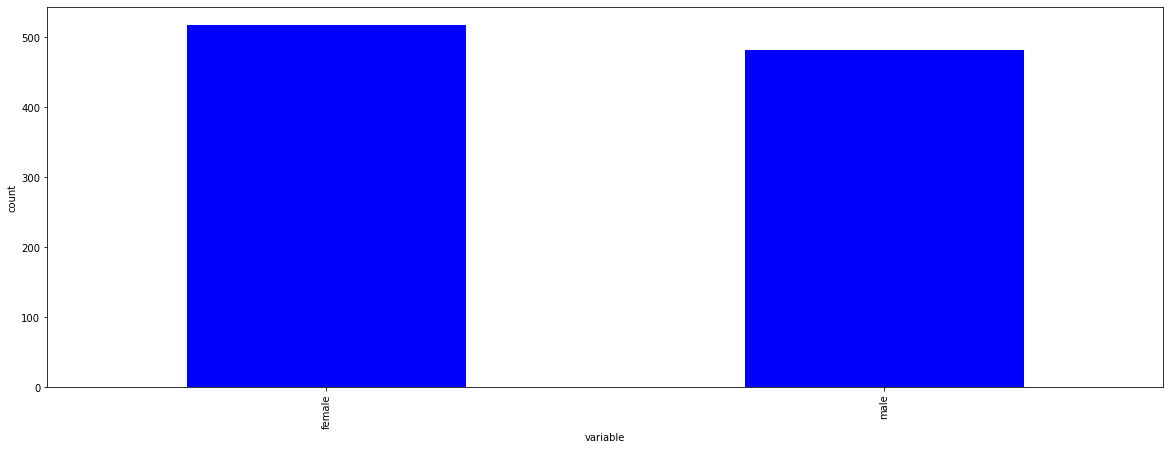

In [19]:
visualizer.Bar_graph(df,df['gender'])

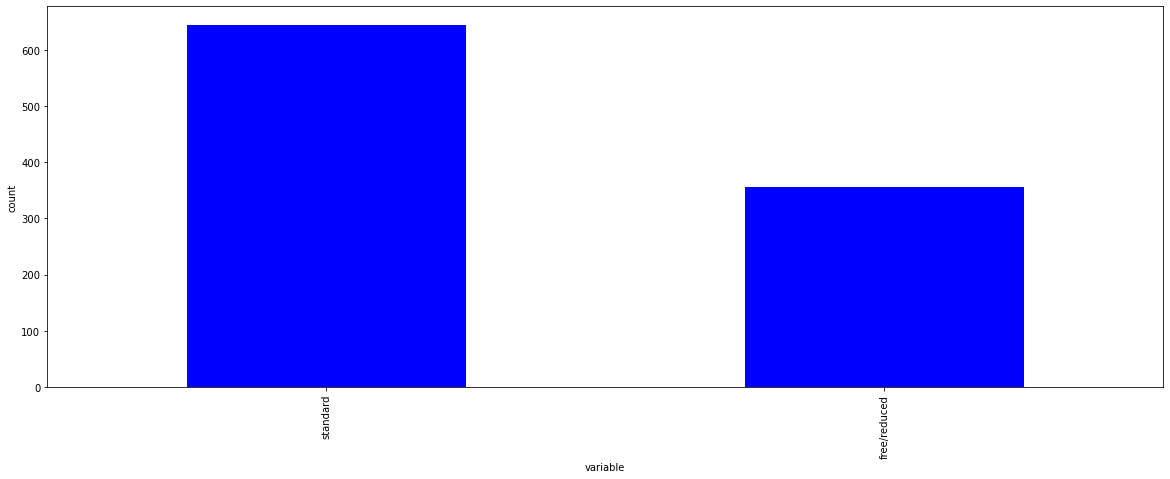

In [20]:
visualizer.Bar_graph(df,df['lunch'])

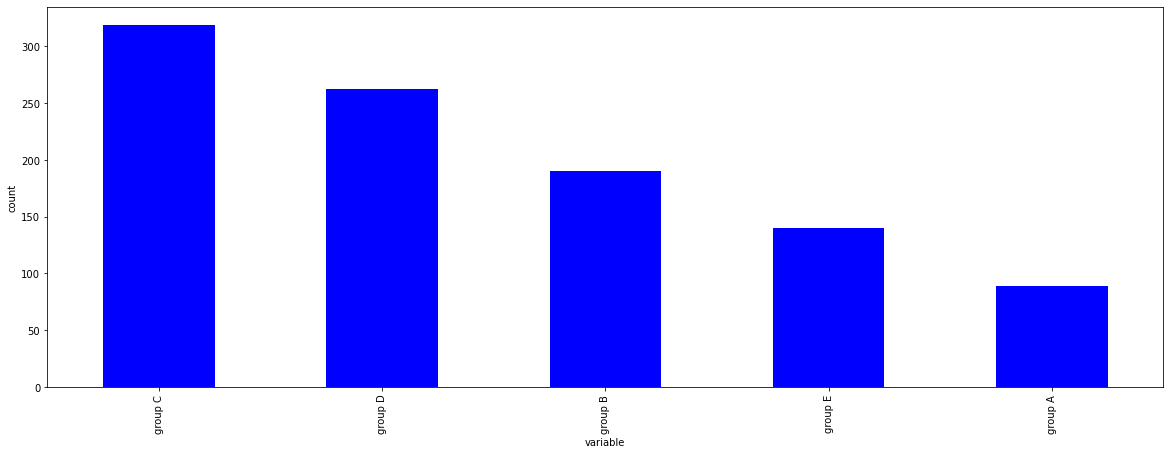

In [21]:
visualizer.Bar_graph(df,df['race/ethnicity'])

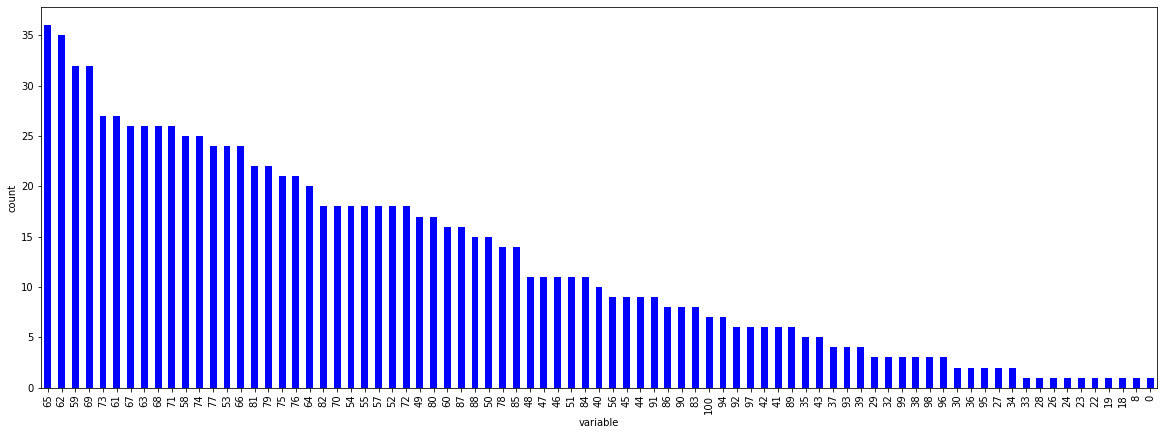

In [22]:
visualizer.Bar_graph(df,df['math_score'])

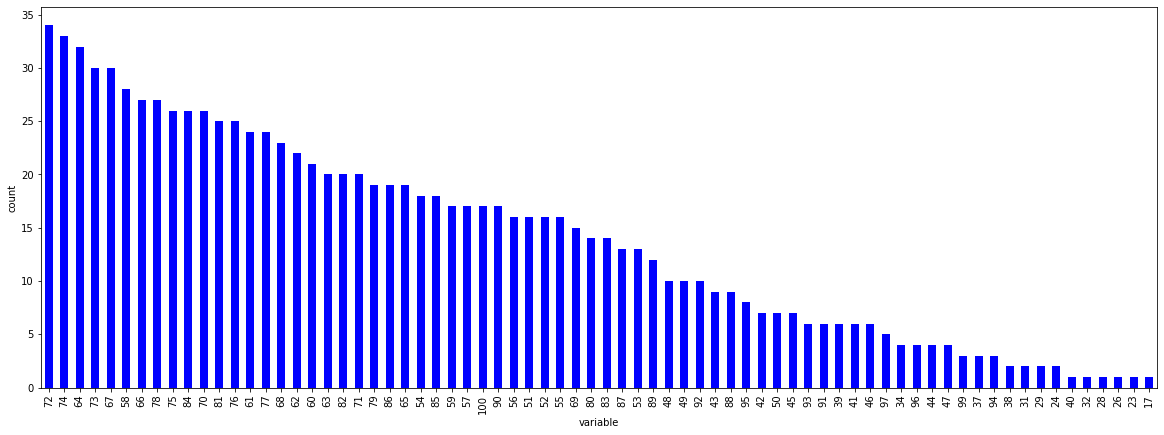

In [23]:
visualizer.Bar_graph(df,df['reading_score'])

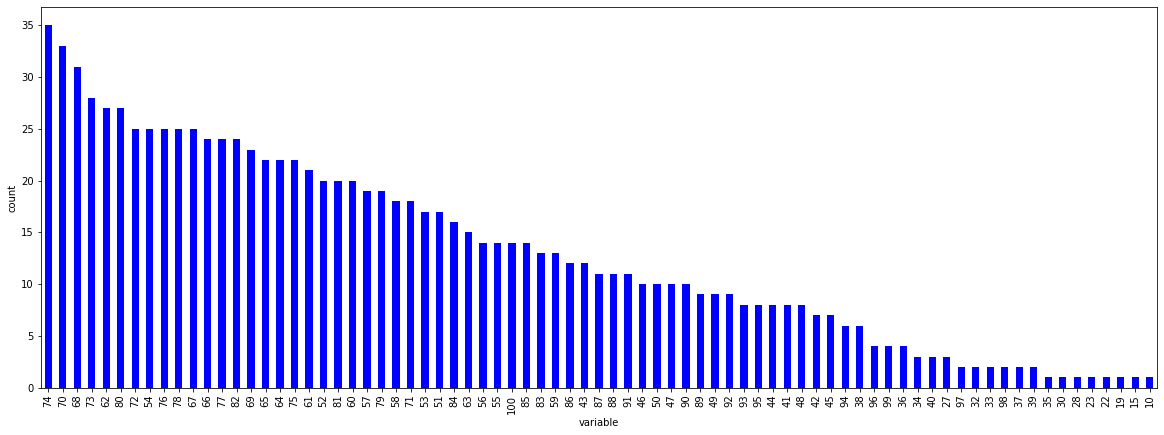

In [24]:
visualizer.Bar_graph(df,df['writing_score'])

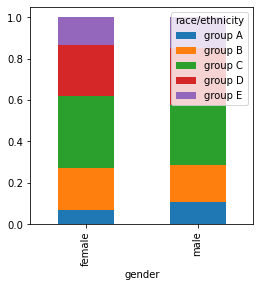

In [25]:
visualizer.cross_tab_with_stacked_bar_chart(df,df['gender'],df['race/ethnicity'])

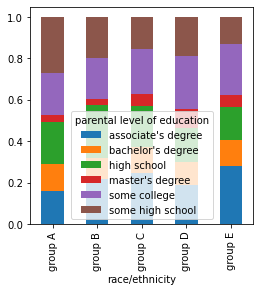

In [26]:
visualizer.cross_tab_with_stacked_bar_chart(df,df['race/ethnicity'],df['parental level of education'])

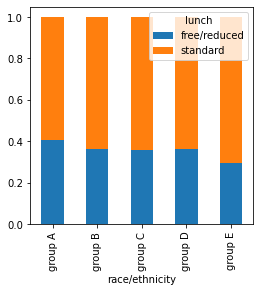

In [27]:
visualizer.cross_tab_with_stacked_bar_chart(df,df['race/ethnicity'],df['lunch'])

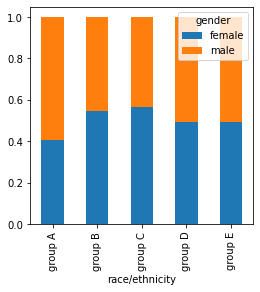

In [28]:
visualizer.cross_tab_with_stacked_bar_chart(df,df['race/ethnicity'],df['gender'])

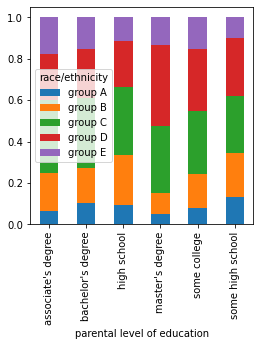

In [29]:
visualizer.cross_tab_with_stacked_bar_chart(df,df['parental level of education'],df['race/ethnicity'])

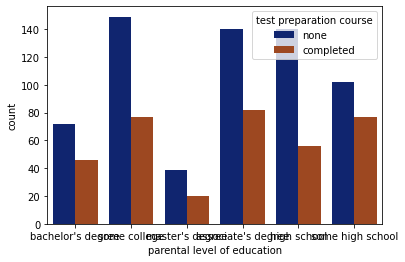

In [30]:
visualizer.count_plot_for_variables(df,'parental level of education','test preparation course','dark')

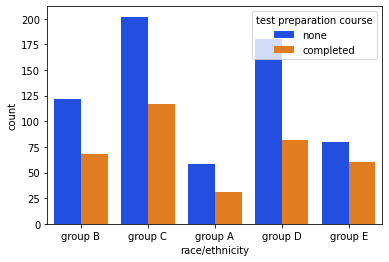

In [31]:
visualizer.count_plot_for_variables(df,'race/ethnicity','test preparation course','bright')

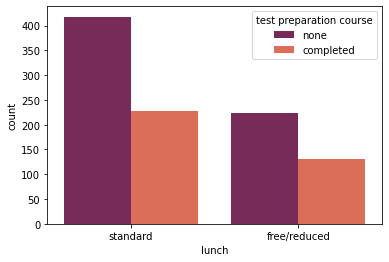

In [32]:
visualizer.count_plot_for_variables(df,'lunch','test preparation course','rocket')

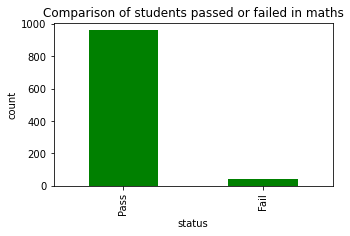

In [33]:
visualizer.Calculate_Marks_with_math_score(df)

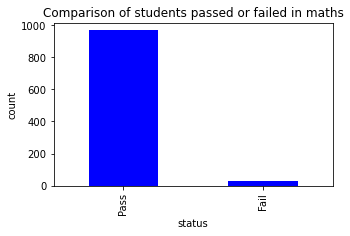

In [34]:
visualizer.Calculate_Marks_with_writing_score(df)

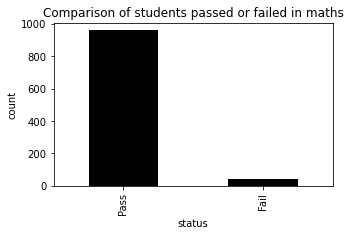

In [35]:
visualizer.Calculate_Pass_Math_with_math_score(df)

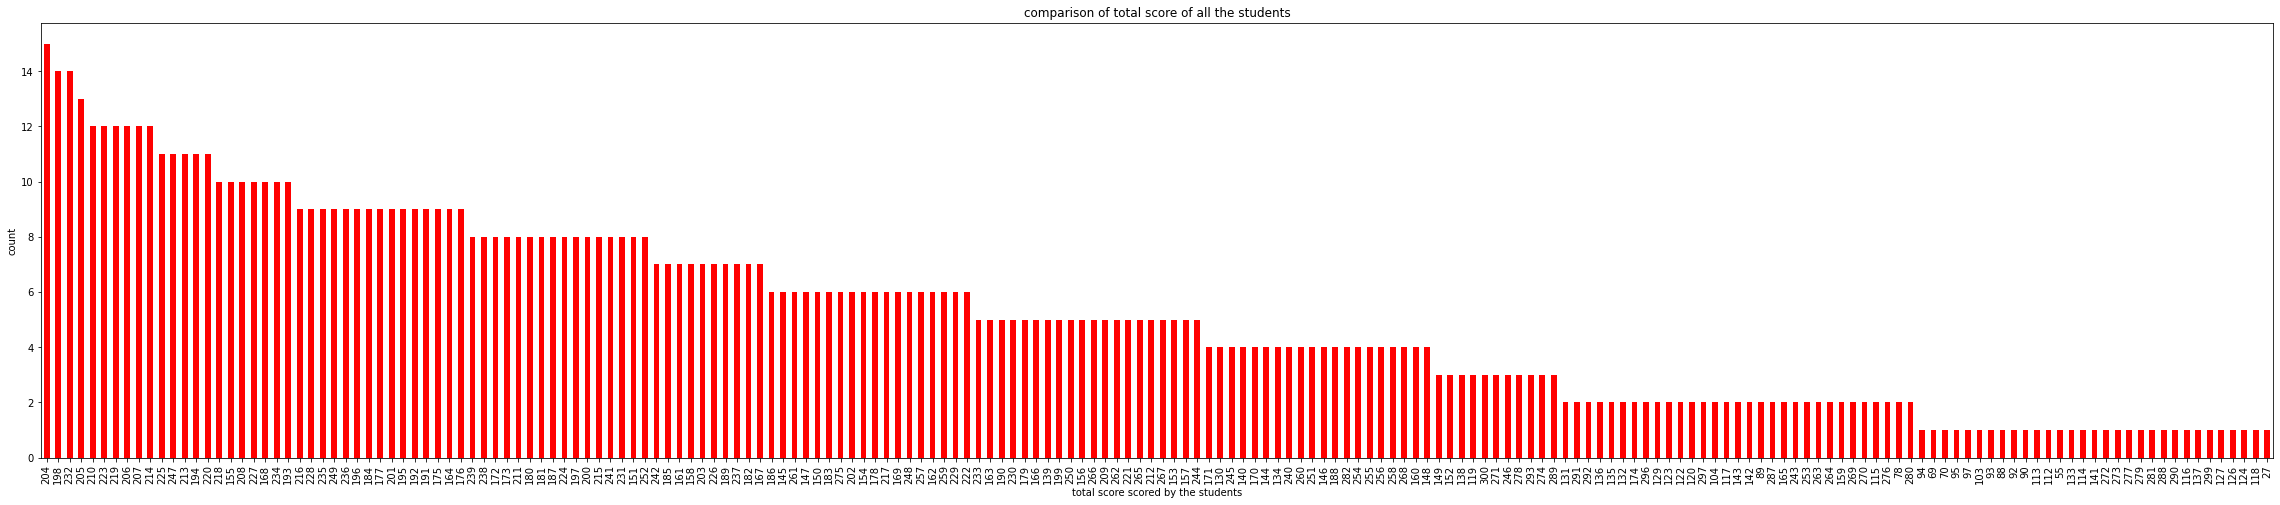

In [36]:
visualizer.Calculate_total_Score_with_math_score(df)

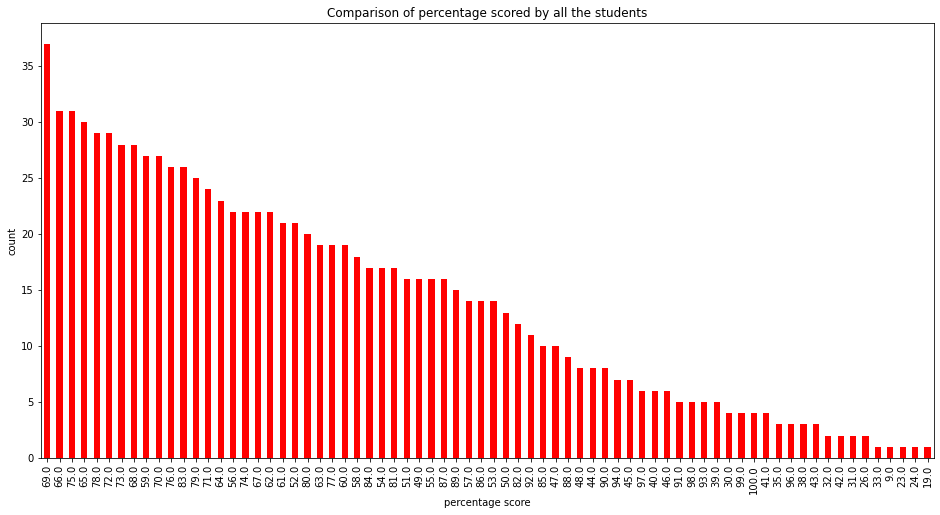

In [37]:
visualizer.Calculate_percentage_with_total_Score(df)

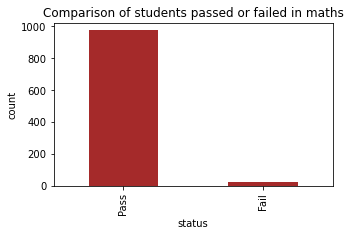

In [38]:
visualizer.Calculate_pass_reading_with_reading_score(df)

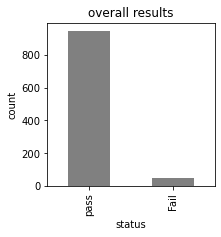

In [39]:
visualizer.Calculate_status_with_pass_math_and_pass_writing(df)

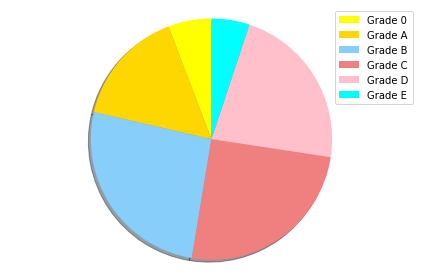

In [40]:
visualizer.pie_chart()

In [41]:
df['grades'] = df.apply(lambda x: visualizer.getgrade(x['percentage'], x['status']), axis = 1 )
    
df['grades'].value_counts()

B    260
C    252
D    223
A    156
O     58
E     51
Name: grades, dtype: int64

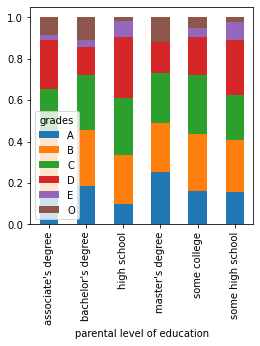

In [42]:
visualizer.cross_tab_with_stacked_bar_chart(df,df['parental level of education'],df['grades'])

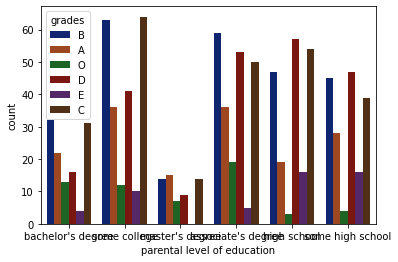

In [43]:
visualizer.count_plot_for_variables(df,'parental level of education','grades','dark')

In [44]:
df['race/ethnicity'] = df['race/ethnicity'].replace('group A', 1)
df['race/ethnicity'] = df['race/ethnicity'].replace('group B', 2)
df['race/ethnicity'] = df['race/ethnicity'].replace('group C', 3)
df['race/ethnicity'] = df['race/ethnicity'].replace('group D', 4)
df['race/ethnicity'] = df['race/ethnicity'].replace('group E', 5)

df['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [45]:
df['grades'] = df['grades'].replace('O', 0)
df['grades'] = df['grades'].replace('A', 1)
df['grades'] = df['grades'].replace('B', 2)
df['grades'] = df['grades'].replace('C', 3)
df['grades'] = df['grades'].replace('D', 4)
df['grades'] = df['grades'].replace('E', 5)

df['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
class Base_Feature_Engineering():

    def __init__(self):
        print("Feature Engineering object created")
    
    def _Label_Encoding(self,data):
        category_col =[var for var in data.columns if data[var].dtypes =="object"] 
        labelEncoder = preprocessing.LabelEncoder()
        mapping_dict={}
        for col in category_col:
            data[col] = labelEncoder.fit_transform(data[col])
            le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
            mapping_dict[col]=le_name_mapping
            return mapping_dict


In [48]:
fe = Base_Feature_Engineering()

Feature Engineering object created


In [58]:
fe._Label_Encoding(df)

In [59]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

class Model_Selector():

    def __init__(self,n_estimators=100,random_state=42,max_depth=10):
        print("Model Selector object created")
        
    def Regression_Model_Selector(self,df):
        seed = 42
        models = []
        models.append(("LR", LogisticRegression()))
        models.append(("RF", RandomForestClassifier()))
        models.append(("KNN", KNeighborsClassifier()))
        models.append(("CART", DecisionTreeClassifier()))
        models.append(("XGB", XGBClassifier()))
        result = []
        names = []
        scoring = 'accuracy'
        seed = 42

        for name, model in models:
            x = df.drop(['grades'],axis=1)
            y = df['grades']
            x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
            kfold = KFold(n_splits = 5, random_state =seed)# 5 split of data (value of k)
            cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
            result.append(cv_results)
            names.append(name)
            msg = (name, cv_results.mean(), cv_results.std())
            print(msg)
        fig = plt.figure(figsize = (8,4))
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(1,1,1)
        plt.boxplot(result)
        ax.set_xticklabels(names)
        plt.show()

In [60]:
MS = Model_Selector()

Model Selector object created


('LR', 0.3728571428571429, 0.055217565971679115)
('RF', 1.0, 0.0)
('KNN', 0.9642857142857144, 0.019691498217271754)
('CART', 1.0, 0.0)
('XGB', 1.0, 0.0)


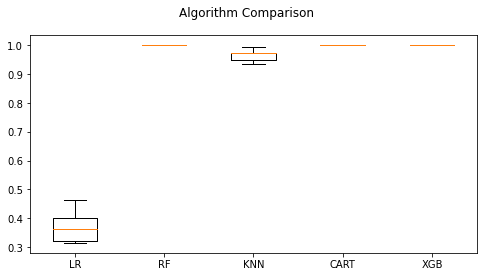

In [61]:
MS.Regression_Model_Selector(df)

In [62]:
from sklearn.metrics import accuracy_score
x = df.drop(['grades'],axis=1)
y = df['grades']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
class Data_Modelling():

    def __init__(self,n_estimators=100,random_state=42,max_depth=10):
        print("Data Modelling object created")

    def Decision_Tree_Model(self,df):
        Classifier = DecisionTreeClassifier(random_state=29)
        clf=Classifier.fit(x_train,y_train)
        DT_pred=Classifier.predict(x_test)
        print("confusion matrix",confusion_matrix(y_test, DT_pred))
        print("classification_report",classification_report(y_test,DT_pred))
        return accuracy_score(y_test,DT_pred)
    
    def Random_Forest_Model(self,df):
        Classifier = RandomForestClassifier(n_estimators=100,random_state=29,max_depth=12)
        clf=Classifier.fit(x_train,y_train)
        RF_pred=Classifier.predict(x_test)
        print("confusion matrix",confusion_matrix(y_test, RF_pred))
        print("classification_report",classification_report(y_test,RF_pred))
        return accuracy_score(y_test,RF_pred)

    def Extreme_Gradient_Boosting_Model(self,df):
        Classifier = XGBClassifier(n_estimators=100,random_state=29,max_depth=9,learning_rate=0.07)
        clf=Classifier.fit(x_train,y_train)
        XGB_pred=Classifier.predict(x_test)
        print("confusion matrix",confusion_matrix(y_test, XGB_pred))
        print("classification_report",classification_report(y_test,XGB_pred))
        return accuracy_score(y_test,XGB_pred)


In [63]:
model = Data_Modelling()

Data Modelling object created


In [64]:
model.Decision_Tree_Model(df)

confusion matrix [[12  0  0  0  0  0]
 [ 0 44  0  0  0  0]
 [ 0  0 79  0  0  0]
 [ 0  0  0 73  0  0]
 [ 0  0  0  0 71  0]
 [ 0  0  0  0  0 21]]
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00        73
           4       1.00      1.00      1.00        71
           5       1.00      1.00      1.00        21

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



1.0

In [65]:
model.Random_Forest_Model(df)

confusion matrix [[12  0  0  0  0  0]
 [ 0 44  0  0  0  0]
 [ 0  0 79  0  0  0]
 [ 0  0  0 73  0  0]
 [ 0  0  0  0 71  0]
 [ 0  0  0  0  0 21]]
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00        73
           4       1.00      1.00      1.00        71
           5       1.00      1.00      1.00        21

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



1.0

In [66]:
model.Extreme_Gradient_Boosting_Model(df)

confusion matrix [[12  0  0  0  0  0]
 [ 0 44  0  0  0  0]
 [ 0  0 79  0  0  0]
 [ 0  0  0 73  0  0]
 [ 0  0  0  0 71  0]
 [ 0  0  0  0  0 21]]
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00        73
           4       1.00      1.00      1.00        71
           5       1.00      1.00      1.00        21

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



1.0